# Value-based prediction

In [1]:
import os

import seaborn as sns
from lqsvg.experiment import plot
from lqsvg.experiment.utils import wandb_runs_dataframe
from matplotlib import pyplot as plt

/Users/angelolovatto/Library/Caches/pypoetry/virtualenvs/lqsvg-G_e_Olvw-py3.8/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


## Matplotlib setup

Latex presets ([ref](https://jwalton.info/Embed-Publication-Matplotlib-Latex/))

In [2]:
from functools import partial

plot.create_latex_style()
set_size = partial(plot.latex_size, width="thesis")

In [3]:
print(*plot.available_styles())

Solarize_Light2 _classic_test_patch bmh classic dark_background fast fivethirtyeight ggplot grayscale seaborn seaborn-bright seaborn-colorblind seaborn-dark seaborn-dark-palette seaborn-darkgrid seaborn-deep seaborn-muted seaborn-notebook seaborn-paper seaborn-pastel seaborn-poster seaborn-talk seaborn-ticks seaborn-white seaborn-whitegrid tableau-colorblind10 tex


In [4]:
print(f"Your style sheets are located at: {plot.STYLE_PATH}")

Your style sheets are located at: /Users/angelolovatto/Library/Caches/pypoetry/virtualenvs/lqsvg-G_e_Olvw-py3.8/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib


In [5]:
# Using seaborn's style
# plt.style.use("seaborn")
sns.set()
# With LaTex fonts
plt.style.use("tex")

In [6]:
def figpath(name: str) -> str:
    return os.path.join("images", name + ".pdf")


def savefig(fig, name):
    return plot.save_pdf_tight(fig, figpath(name))

## TD(0)

In [7]:
DATA = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={"polyak": 0.995},
    tags=["ValueLearning", "9.30.0"],
)
DATA.head()

,trainer/global_step,val/grad_acc,val/bootstrap/relative_qval_err,_step,val/action_grad_acc,_runtime,epoch,val/bootstrap/action_grad_acc,val/relative_vval_err,_timestamp,...,summary/test/grad_acc,summary/train/action_grad_acc,summary/val/bootstrap/relative_qval_err,summary/trainer/global_step,summary/passive_eigvals,summary/test/relative_vval_err,summary/test/action_grad_acc,summary/test/bootstrap/action_grad_acc,summary/train/bootstrap/action_grad_acc,summary/val/action_grad_acc
0,0,0.482922,6.206344,0,0.607343,5,0,0.577971,35.23204,1633021724,...,0.653986,0.825521,0.903581,28160,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5.042147,0.826376,0.614745,0.665886,0.828548
1,49,NaN,NaN,1,NaN,7,0,NaN,NaN,1633021726,...,0.653986,0.825521,0.903581,28160,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5.042147,0.826376,0.614745,0.665886,0.828548
2,99,NaN,NaN,2,NaN,9,0,NaN,NaN,1633021728,...,0.653986,0.825521,0.903581,28160,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5.042147,0.826376,0.614745,0.665886,0.828548
3,199,NaN,NaN,4,NaN,14,0,NaN,NaN,1633021733,...,0.653986,0.825521,0.903581,28160,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5.042147,0.826376,0.614745,0.665886,0.828548
4,249,NaN,NaN,5,NaN,17,0,NaN,NaN,1633021736,...,0.653986,0.825521,0.903581,28160,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5.042147,0.826376,0.614745,0.665886,0.828548


In [8]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10059 entries, 0 to 10058
Data columns (total 63 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   trainer/global_step                        10059 non-null  int64  
 1   val/grad_acc                               1268 non-null   float64
 2   val/bootstrap/relative_qval_err            1268 non-null   float64
 3   _step                                      10059 non-null  int64  
 4   val/action_grad_acc                        1268 non-null   float64
 5   _runtime                                   10059 non-null  int64  
 6   epoch                                      10059 non-null  int64  
 7   val/bootstrap/action_grad_acc              1268 non-null   float64
 8   val/relative_vval_err                      1268 non-null   float64
 9   _timestamp                                 10059 non-null  int64  
 10  train/action_grad_acc 

In [9]:
DATA["exploration"] = DATA["config/exploration/type"]

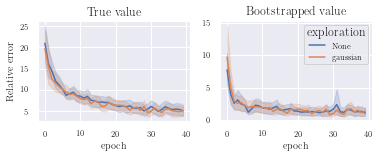

In [10]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, figsize=set_size(subplots=(1, 2)))
sns.lineplot(
    ax=ax0,
    data=DATA,
    x="epoch",
    y="val/relative_vval_err",
    hue="exploration",
    #     units="config/seed",
    #     estimator=None,
    legend=False,
)
ax0.set_ylabel("Relative error")
ax0.set_title("True value")

sns.lineplot(
    ax=ax1,
    data=DATA,
    x="epoch",
    y="val/bootstrap/relative_qval_err",
    hue="exploration",
    #     units="config/seed",
    #     estimator=None,
)
ax1.set_ylabel(None)
ax1.set_title("Bootstrapped value")

savefig(fig, "value-based_value_errors")

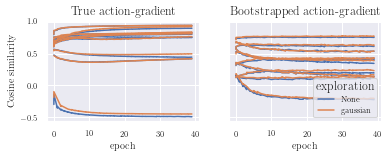

In [11]:
fig, (ax0, ax1) = plt.subplots(
    1, 2, sharex=True, sharey=True, figsize=set_size(subplots=(1, 2))
)

sns.lineplot(
    ax=ax0,
    data=DATA,
    x="epoch",
    y="val/action_grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
    legend=False,
)
ax0.set_ylabel("Cosine similarity")
ax0.set_title("True action-gradient")

sns.lineplot(
    ax=ax1,
    data=DATA,
    x="epoch",
    y="val/bootstrap/action_grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax1.set_title("Bootstrapped action-gradient")

savefig(fig, "value-based_action-gradient_acc")

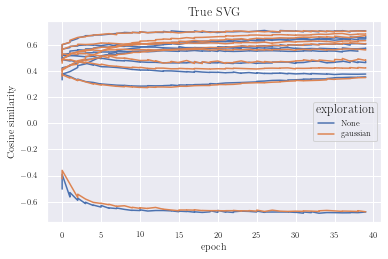

In [12]:
fig, ax = plt.subplots(figsize=set_size())

sns.lineplot(
    ax=ax,
    data=DATA,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax.set_ylabel("Cosine similarity")
ax.set_title("True SVG")

savefig(fig, "value-based_gradient_acc")

## MAGE

In [13]:
MAGE = wandb_runs_dataframe(
    "angelovtt/ch5", configs={"learning_rate": 1e-2}, tags=["MAGEPrediction", "10.3.0"]
)
MAGE.head()

,grad_2.0_norm_qval.q_values.1.linear_step,trainer/global_step,_step,train/action_grad_acc,grad_2.0_norm_qval.q_values.0.quad_step,grad_2.0_norm_total_step,grad_2.0_norm_qval.q_values.0.const_step,_runtime,grad_2.0_norm_qval.q_values.1.quad_step,train/bootstrap/relative_qval_err,...,summary/trainable_parameters,summary/grad_2.0_norm_policy.K_epoch,summary/train/bootstrap/relative_qval_err,summary/val/grad_acc,summary/grad_2.0_norm_total_step,summary/test/bootstrap/action_grad_acc,summary/controllability,summary/train/loss,summary/train/relative_vval_err,summary/grad_2.0_norm_policy.k_epoch
0,1.8116,149,3,0.699114,3.4308,6846.877441,0.1918,16,6.7897,1.644264,...,2100,92446.890625,0.470651,0.726853,201352.46875,0.638614,True,491.980774,2.111768,3462.86377
1,1.5101,199,4,0.725107,10.1202,8733.951172,0.2825,20,5.1498,1.289983,...,2100,92446.890625,0.470651,0.726853,201352.46875,0.638614,True,491.980774,2.111768,3462.86377
2,1.3553,249,5,0.745503,1.8372,10763.113281,0.1462,23,5.0847,1.408986,...,2100,92446.890625,0.470651,0.726853,201352.46875,0.638614,True,491.980774,2.111768,3462.86377
3,1.1482,299,6,0.756019,4.0127,12650.089844,0.2474,27,4.6770,1.433868,...,2100,92446.890625,0.470651,0.726853,201352.46875,0.638614,True,491.980774,2.111768,3462.86377
4,0.9882,349,7,0.754212,5.0869,14971.918945,0.2453,30,3.7506,1.139967,...,2100,92446.890625,0.470651,0.726853,201352.46875,0.638614,True,491.980774,2.111768,3462.86377


In [14]:
MAGE["exploration"] = MAGE["config/exploration/type"]

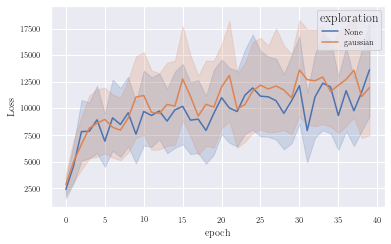

In [15]:
fig, ax = plt.subplots(figsize=set_size())

sns.lineplot(
    ax=ax,
    data=MAGE,
    x="epoch",
    y="train/loss",
    hue="exploration",
)
ax.set_ylabel("Loss")

savefig(fig, "mage_loss")

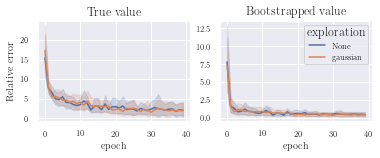

In [16]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, figsize=set_size(subplots=(1, 2)))

sns.lineplot(
    ax=ax0,
    data=MAGE,
    x="epoch",
    y="val/relative_vval_err",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Relative error")
ax0.set_title("True value")

sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="epoch",
    y="val/bootstrap/relative_qval_err",
    hue="exploration",
)
ax1.set_ylabel(None)
ax1.set_title("Bootstrapped value")

savefig(fig, "mage_value_errors")

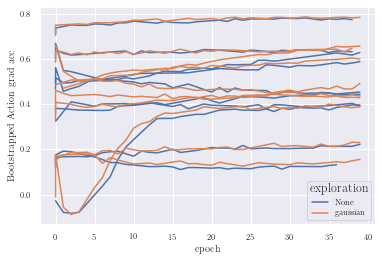

In [17]:
ax = sns.lineplot(
    data=MAGE,
    x="epoch",
    y="val/bootstrap/action_grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax.set_ylabel("Bootstrapped Action grad acc")
plt.show()

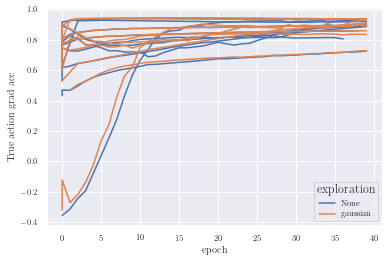

In [18]:
ax = sns.lineplot(
    data=MAGE,
    x="epoch",
    y="val/action_grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax.set_ylabel("True action grad acc")
plt.show()

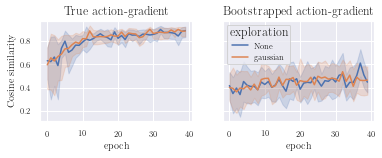

In [19]:
fig, (ax0, ax1) = plt.subplots(
    1, 2, sharex=True, sharey=True, figsize=set_size(subplots=(1, 2))
)

sns.lineplot(
    ax=ax0,
    data=MAGE,
    x="epoch",
    y="val/action_grad_acc",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Cosine similarity")
ax0.set_title("True action-gradient")

sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="epoch",
    y="val/bootstrap/action_grad_acc",
    hue="exploration",
)
ax1.set_title("Bootstrapped action-gradient")

savefig(fig, "mage_action-gradient_acc")

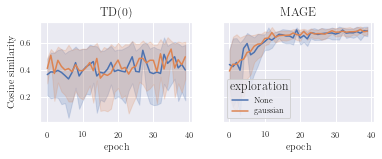

In [20]:
fig, (ax0, ax1) = plt.subplots(
    1, 2, sharex=True, sharey=True, figsize=set_size(subplots=(1, 2))
)

sns.lineplot(
    ax=ax0,
    data=DATA,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Cosine similarity")
ax0.set_title("TD(0)")

sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
)
ax1.set_title("MAGE")

savefig(fig, "td_vs_mage_gradient_acc")